# Machine learning 2 - Classification

# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### For classification visualization purpose ###
from sklearn.datasets import make_classification
from scipy.spatial.distance import cdist
from utils import visualize_svm_model, visualize_knn_model

plt.style.use('ggplot') # change plot style

# New classification algorithms

## 1. K-Nearest Neighbors (KNN)
* KNN is a simple classification model that makes it prediction merely on the class of the majority of observations near it.

### 1.1. Create dataset

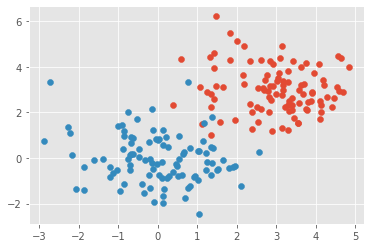

In [2]:
### Function to create sample fake dataset ###
def create_normal_samples(mean_1=0.0, mean_2=2.0, samples_per_classes=100):
    X = np.concatenate([
        np.random.normal(loc=mean_1, size=(samples_per_classes, 2)), 
        np.random.normal(loc=mean_2, size=(samples_per_classes, 2))
    ])
    Y = np.concatenate([np.ones(100,), np.zeros(100,)])

    return X, Y

X, Y = create_normal_samples(mean_2=3.0)

for class_ in np.unique(Y):
    cluster = X[Y == class_]
    plt.scatter(cluster[:,0], cluster[:, 1])
    
plt.show()

### 1.2. Create KNN model with k = 5

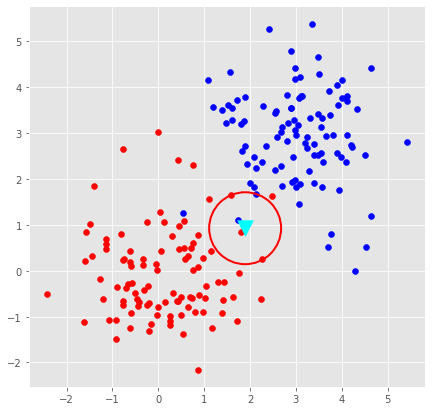

In [3]:
X, Y = create_normal_samples(mean_2=3.0)
visualize_knn_model(X, Y)

## 2. Support Vector Machine
* Support vector machine is another simple classifier but affective and widely used in many problems. The objective is find a decision boundary (A linear function, if not considering the kernel trick) that maximize the margin between the two classes.
* Last time we talked about gradient descent being an algorithm to minimize a judging criteria. So what is the judging criteria for SVM ?

#### Hinge loss 
![Hinge Loss formula](https://raw.githubusercontent.com/tejasmhos/Linear-SVM-Using-Squared-Hinge-Loss/master/equation.jpeg)

#### Implement gradient descent with hinge loss 

Iter# 1  Weights :  [0.87653031 0.18447468]  Bias :  [0.98971493]  Loss :  53.37383807448178
Iter# 2  Weights :  [0.80979148 0.12500724]  Bias :  [0.98037404]  Loss :  44.027277334736226
Iter# 3  Weights :  [0.7491644 0.0710404]  Bias :  [0.97189048]  Loss :  36.32107965465308
Iter# 4  Weights :  [0.6940869  0.02206818]  Bias :  [0.96418539]  Loss :  29.96734790818088
Iter# 5  Weights :  [ 0.64404855 -0.0223689 ]  Bias :  [0.95718716]  Loss :  24.728713280460397
Iter# 6  Weights :  [ 0.59858584 -0.06268802]  Bias :  [0.95083078]  Loss :  20.40946713400908
Iter# 7  Weights :  [ 0.55826368 -0.08951963]  Bias :  [0.945055]  Loss :  16.86090748039362
Iter# 8  Weights :  [ 0.52129734 -0.10723043]  Bias :  [0.93964653]  Loss :  14.785642185117077
Iter# 9  Weights :  [ 0.4864719  -0.12389487]  Bias :  [0.9345506]  Loss :  13.125889739447782
Iter# 10  Weights :  [ 0.45366293 -0.13957381]  Bias :  [0.92974904]  Loss :  11.65348010492734
Iter# 11  Weights :  [ 0.4227532  -0.15432454]  Bias :  [0

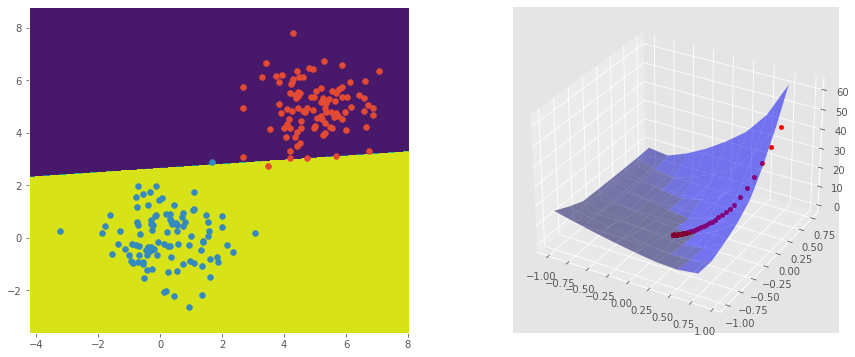

In [10]:
X, Y = create_normal_samples(mean_2=5.0)
visualize_svm_model(X, Y, lr=0.001, iterations=50)

<img src='./regression_viz.gif?7' width=640, height=480>

## 3. Naive Bayes

![Naive Bayes formula](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)

# Loading and preprocessing data

In [5]:
data = pd.read_csv('../datasets/wine.csv')
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


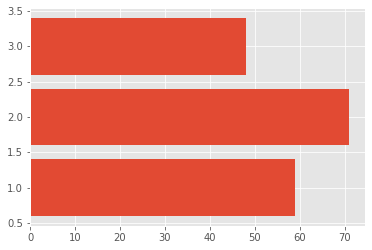

In [6]:
class_count = data.groupby('Class').size()
classes = list(data.groupby('Class').sum().index)

plt.barh(classes, class_count)
plt.show()

In [7]:
cols_isna = data.isna().any()
na_cols = data.columns[cols_isna].values

data[na_cols]

""
0
1
2
3
4
...
173
174
175
176
